# LSTM
An introduction to LSTM Forecasting in scalecast.

- See the model [documentation](https://scalecast.readthedocs.io/en/latest/Forecaster/_forecast.html#lstm).
- [Data](https://www.kaggle.com/datasets/rakannimer/air-passengers).
- [Blog post](https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf).
- [RNN Example Notebook](https://scalecast-examples.readthedocs.io/en/latest/rnn/rnn.html).
- Required library: `pip install tensorflow`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [2]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

## EDA

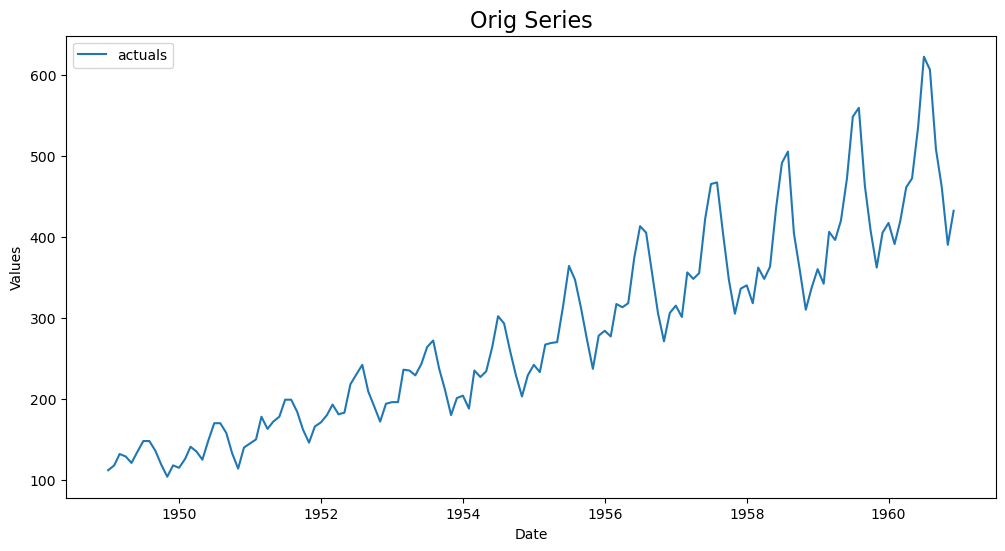

In [3]:
f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    test_length = 12,
    future_dates = 12,
    cis = False,
)
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [4]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=12
    Xvars=[]
    TestLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

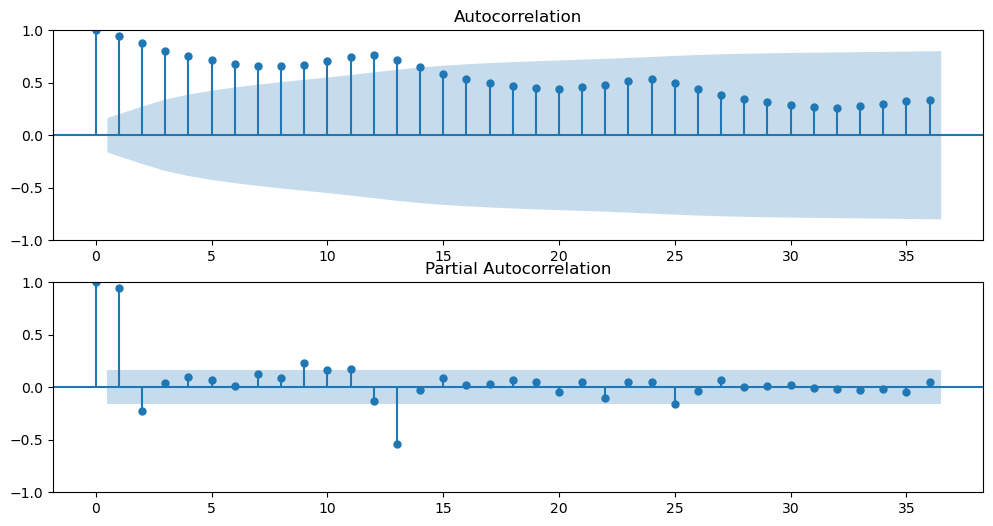

In [31]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36,method='ywm')
plt.show()

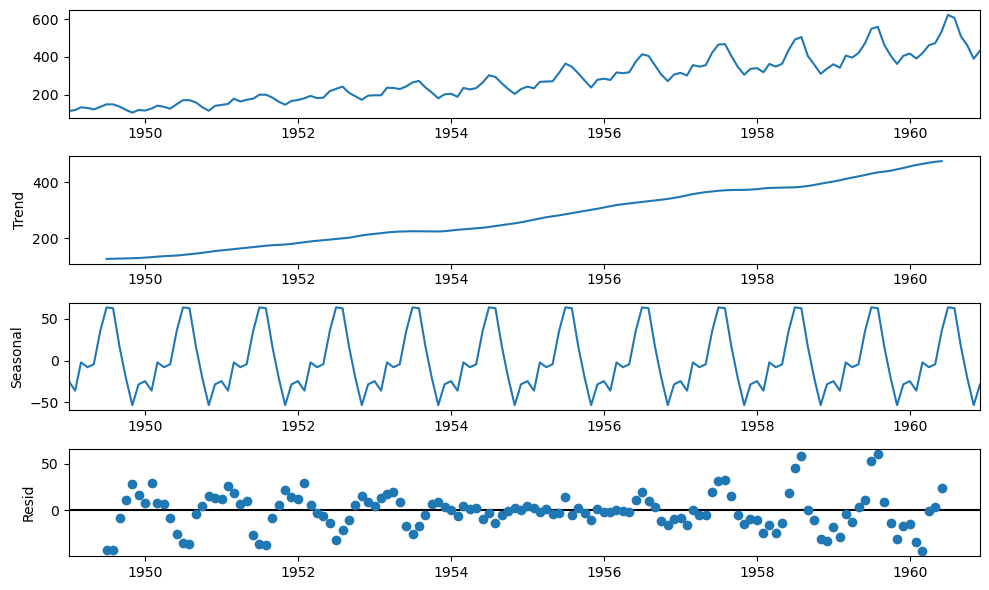

In [6]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose().plot()
plt.show()

The below shows the results of the ADF test indicate the series is not stationary.

In [7]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
----------------------------------------------------------------------------------------------------


## LSTM Model

### Attempt 1
- Default parameters.

In [8]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

2023-09-15 21:51:35.258827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-15 21:51:36.859779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5/5 [==============================] - 0s 966us/step


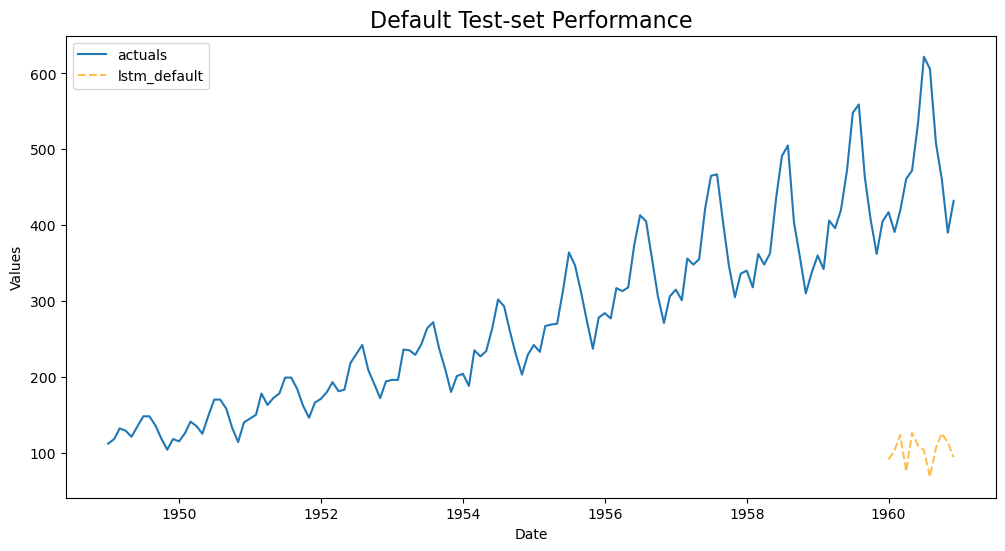

In [9]:
f.plot_test_set()
plt.title('Default Test-set Performance',size=16)
plt.show()

### Attempt 2
- Add more lags (2 years).

In [10]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

4/4 [==============================] - 0s 2ms/step


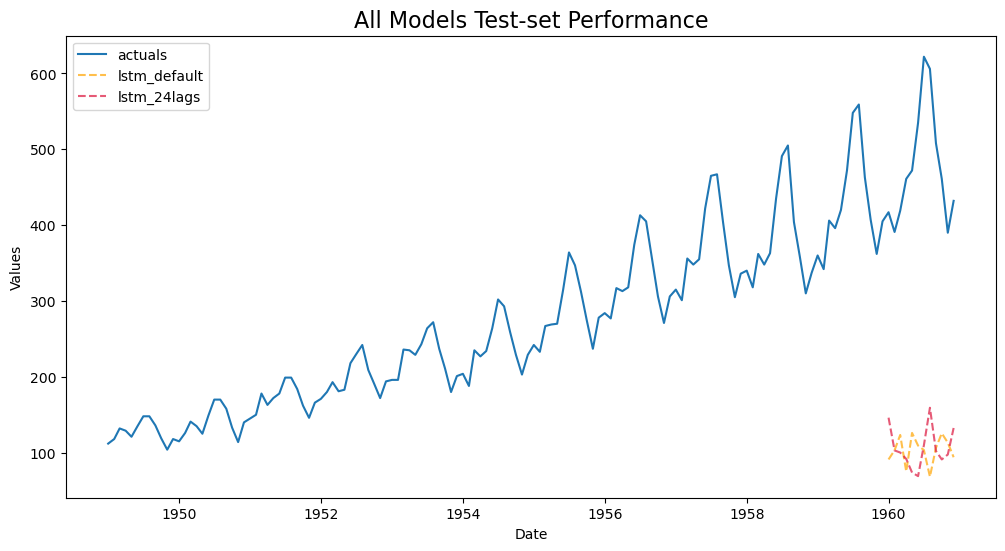

In [11]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### Attempt 3
- Add more epochs (5).

In [12]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)

Epoch 1/5
3/3 [==============================] - 1s 148ms/step - loss: 0.3803 - val_loss: 0.6974
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3726 - val_loss: 0.6868
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3650 - val_loss: 0.6763
Epoch 4/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3575 - val_loss: 0.6660
Epoch 5/5
1/1 [==============================] - 0s 206ms/step
Epoch 1/5
3/3 [==============================] - 1s 130ms/step - loss: 0.3207 - val_loss: 0.5965
Epoch 2/5
3/3 [==============================] - 0s 14ms/step - loss: 0.3124 - val_loss: 0.5845
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3035 - val_loss: 0.5722
Epoch 4/5
3/3 [==============================] - 0s 14ms/step - loss: 0.2943 - val_loss: 0.5592
Epoch 5/5
4/4 [==============================] - 0s 2ms/step


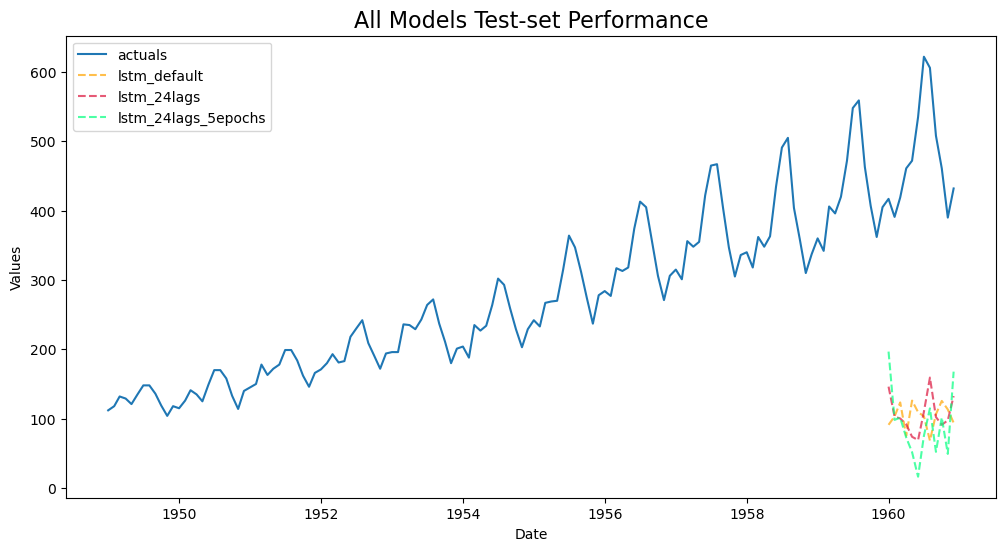

In [13]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### Attempt 4
- Add layers and early stoping.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(
    call_me='lstm_24lags_earlystop_3layers',
    lags=24,
    epochs=25,
    validation_split=.2,
    shuffle=True,
    callbacks=EarlyStopping(
      monitor='val_loss',
      patience=5
    ),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0)
)

Epoch 1/25
3/3 [==============================] - 3s 320ms/step - loss: 0.3487 - val_loss: 0.6158
Epoch 2/25
3/3 [==============================] - 0s 25ms/step - loss: 0.3336 - val_loss: 0.5916
Epoch 3/25
3/3 [==============================] - 0s 25ms/step - loss: 0.3164 - val_loss: 0.5622
Epoch 4/25
3/3 [==============================] - 0s 25ms/step - loss: 0.2946 - val_loss: 0.5244
Epoch 5/25
3/3 [==============================] - 0s 24ms/step - loss: 0.2660 - val_loss: 0.4748
Epoch 6/25
3/3 [==============================] - 0s 25ms/step - loss: 0.2356 - val_loss: 0.4194
Epoch 7/25
3/3 [==============================] - 0s 25ms/step - loss: 0.2171 - val_loss: 0.3852
Epoch 8/25
3/3 [==============================] - 0s 24ms/step - loss: 0.2073 - val_loss: 0.3635
Epoch 9/25
3/3 [==============================] - 0s 25ms/step - loss: 0.1912 - val_loss: 0.3510
Epoch 10/25
3/3 [==============================] - 0s 24ms/step - loss: 0.1770 - val_loss: 0.3426
Epoch 11/25
3/3 [===========

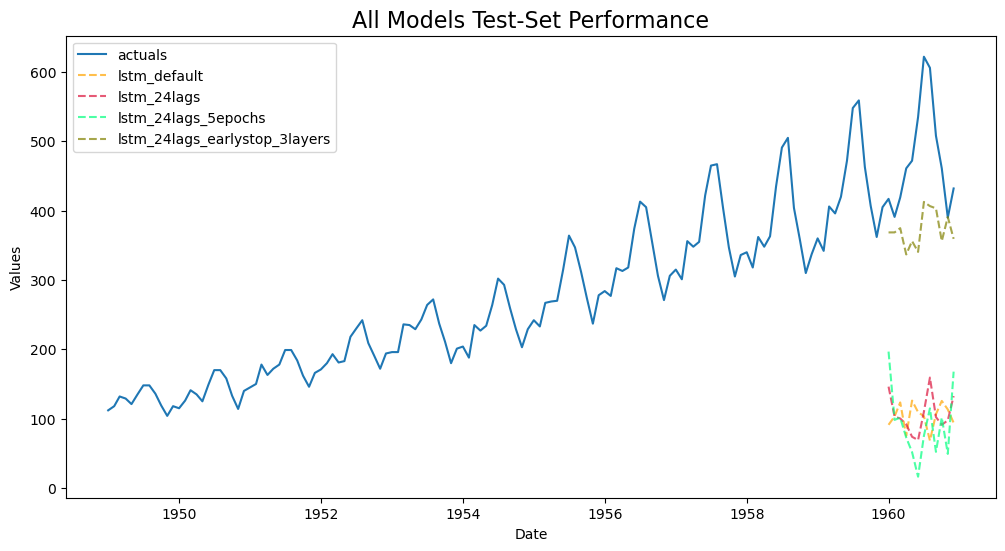

In [15]:
f.plot_test_set()
plt.title('All Models Test-Set Performance',size=16)
plt.show()

### Attempt 5
- Add more lags (3 years).

Epoch 1/15
3/3 [==============================] - 4s 458ms/step - loss: 0.3843 - val_loss: 0.5381
Epoch 2/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2959 - val_loss: 0.2003
Epoch 3/15
3/3 [==============================] - 0s 53ms/step - loss: 0.1717 - val_loss: 0.1542
Epoch 4/15
3/3 [==============================] - 0s 54ms/step - loss: 0.1123 - val_loss: 0.2786
Epoch 5/15
3/3 [==============================] - 0s 52ms/step - loss: 0.1365 - val_loss: 0.1858
Epoch 6/15
3/3 [==============================] - 0s 53ms/step - loss: 0.1062 - val_loss: 0.1196
Epoch 7/15
3/3 [==============================] - 0s 52ms/step - loss: 0.1204 - val_loss: 0.1319
Epoch 8/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0910 - val_loss: 0.1782
Epoch 9/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0940 - val_loss: 0.1430
Epoch 10/15
3/3 [==============================] - 0s 53ms/step - loss: 0.0853 - val_loss: 0.1287
Epoch 11/15
3/3 [===========

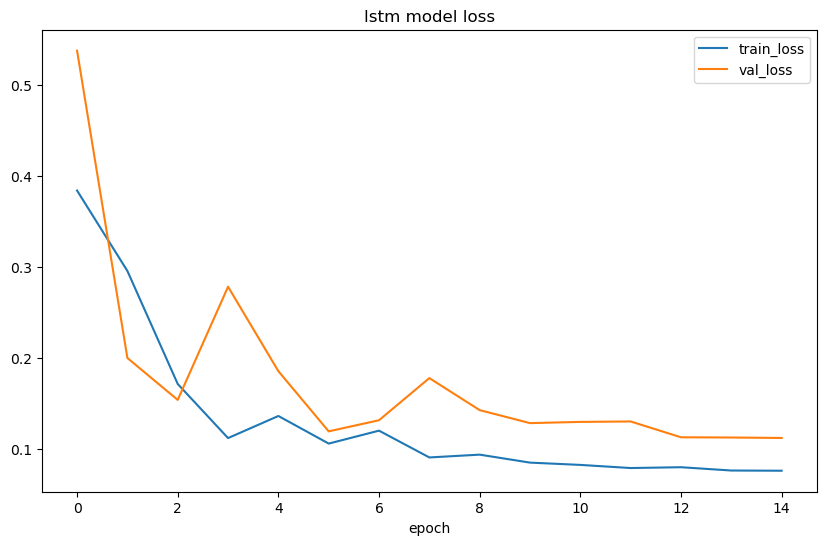

Epoch 1/15
3/3 [==============================] - 4s 431ms/step - loss: 0.3559 - val_loss: 0.5288
Epoch 2/15
3/3 [==============================] - 0s 55ms/step - loss: 0.2547 - val_loss: 0.3065
Epoch 3/15
3/3 [==============================] - 0s 55ms/step - loss: 0.1906 - val_loss: 0.2443
Epoch 4/15
3/3 [==============================] - 0s 54ms/step - loss: 0.1250 - val_loss: 0.2124
Epoch 5/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0945 - val_loss: 0.1338
Epoch 6/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0900 - val_loss: 0.1624
Epoch 7/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0825 - val_loss: 0.1175
Epoch 8/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0775 - val_loss: 0.1211
Epoch 9/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0735 - val_loss: 0.1289
Epoch 10/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0718 - val_loss: 0.1125
Epoch 11/15
3/3 [===========

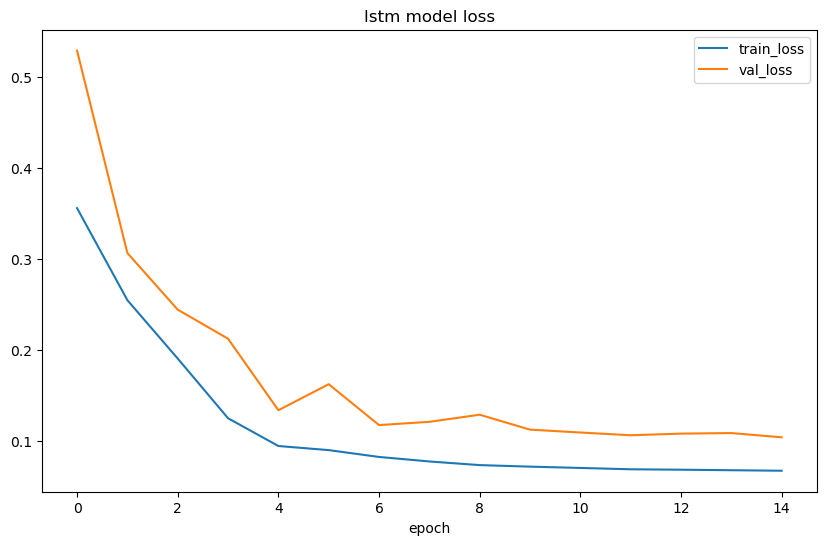

In [16]:
f.manual_forecast(
    call_me='lstm_24lags_4layers_15epochs',
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(72,)*4,
    dropout=(0,)*4,
    plot_loss=True
)

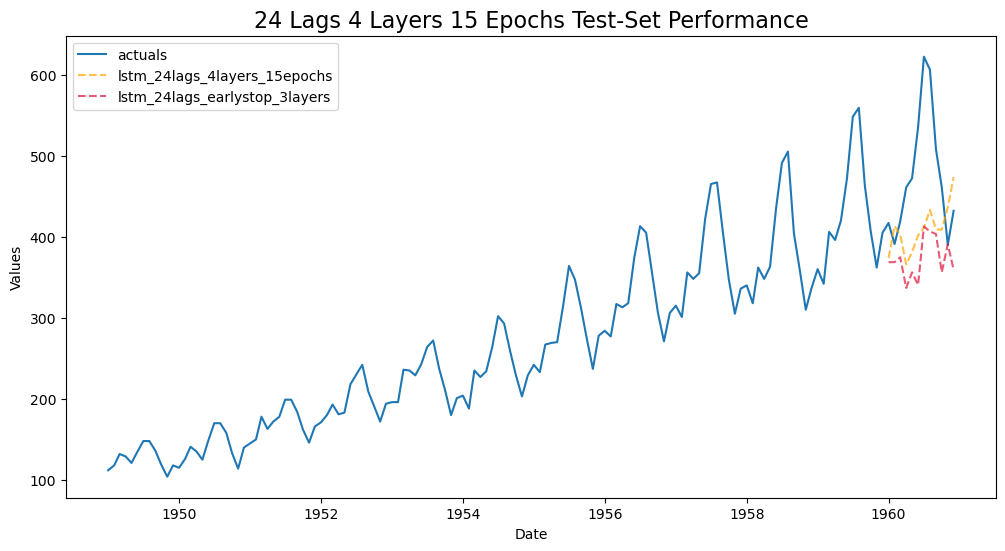

In [17]:
f.plot_test_set(order_by='TestSetRMSE',models='top_2')
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

The last model run looks in the same ballpark as the actual series' trend, but still not great. Let's take things to the next level with this model by adding many more layers and training epochs.

### Attempt 6

Epoch 1/50
4/4 [==============================] - 3s 199ms/step - loss: 0.3232 - val_loss: 0.6448
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.3128 - val_loss: 0.6322
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.3013 - val_loss: 0.6176
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.2883 - val_loss: 0.6002
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2731 - val_loss: 0.5787
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2554 - val_loss: 0.5516
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.2352 - val_loss: 0.5177
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2147 - val_loss: 0.4769
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1962 - val_loss: 0.4304
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1835 - val_loss: 0.3827
Epoch 11/50
4/4 [===========

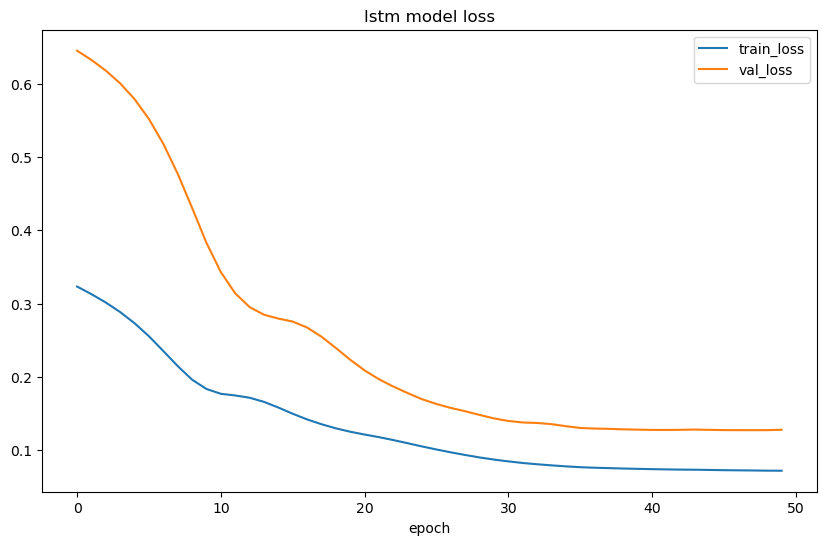

Epoch 1/50
4/4 [==============================] - 3s 202ms/step - loss: 0.3125 - val_loss: 0.6627
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 0.3007 - val_loss: 0.6480
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.2881 - val_loss: 0.6315
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 0.2741 - val_loss: 0.6120
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.2578 - val_loss: 0.5880
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2386 - val_loss: 0.5579
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2162 - val_loss: 0.5201
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1923 - val_loss: 0.4741
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1691 - val_loss: 0.4213
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1518 - val_loss: 0.3669
Epoch 11/50
4/4 [===========

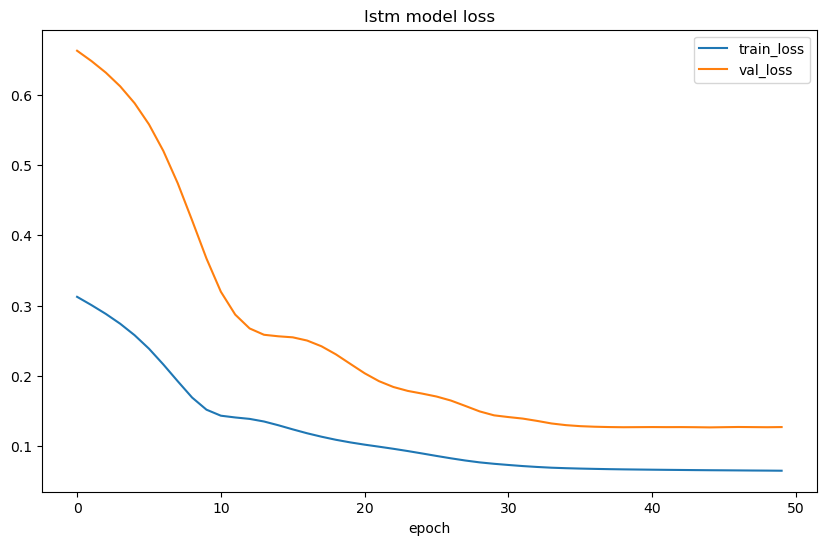

In [18]:
f.manual_forecast(
    call_me='lstm_best',
    lags=6,
    epochs=50,
    validation_split=.1,
    shuffle=False,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(15,)*3,
    dropout=(0,)*3,
    plot_loss=True,
)

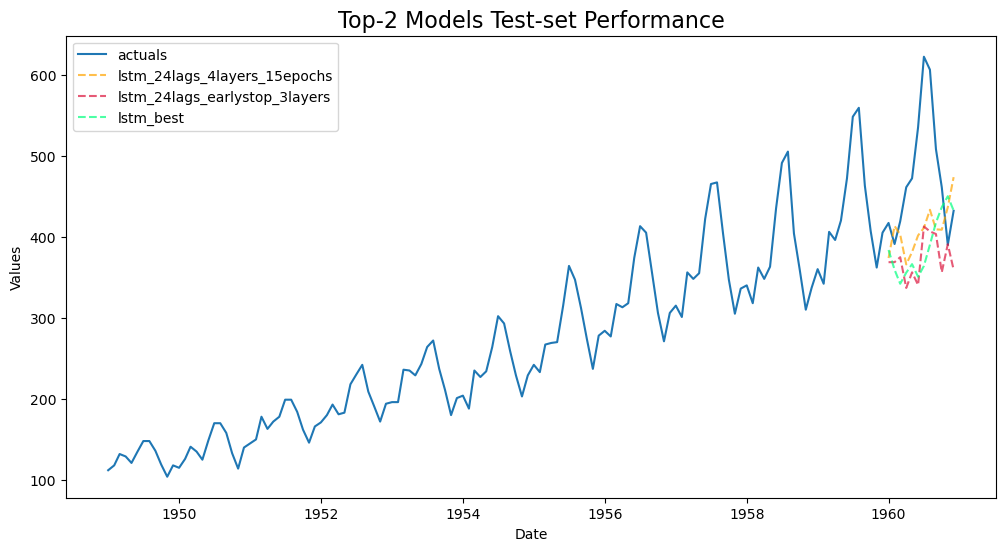

In [19]:
f.plot_test_set(order_by='TestSetRMSE',models='top_3')
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()

Finally, an LSTM model that looks somewhat believable, but it took a lot of work and took a long time to evaluate. Let's see if we can outpace this performance with a simple linear regression model.

## Prepare Forecast for MLR
- Test length already set
- Forecast horizon already set
- Add lags (24) - for MLR, these are added as regressors, not specified when calling the model (unlike LSTM)
- Add seasonal regressors (month, quarter - using dummy vars)
- Add year variable
- Add time trend
- Difference data since it is not stationary

In [20]:
f.drop_all_Xvars()

In [21]:
from scalecast.SeriesTransformer import SeriesTransformer

transformer = SeriesTransformer(f,deepcopy=False)
f = transformer.DiffTransform()

f.add_ar_terms(24)
f.add_seasonal_regressors('month',dummy=True)

## MLR Modeling

In [22]:
f.set_estimator('mlr')
f.manual_forecast()

In [23]:
f = transformer.DiffRevert(
    exclude_models = [m for m in f.history if m != 'mlr']
) # exclude all lstm models already called from the revert

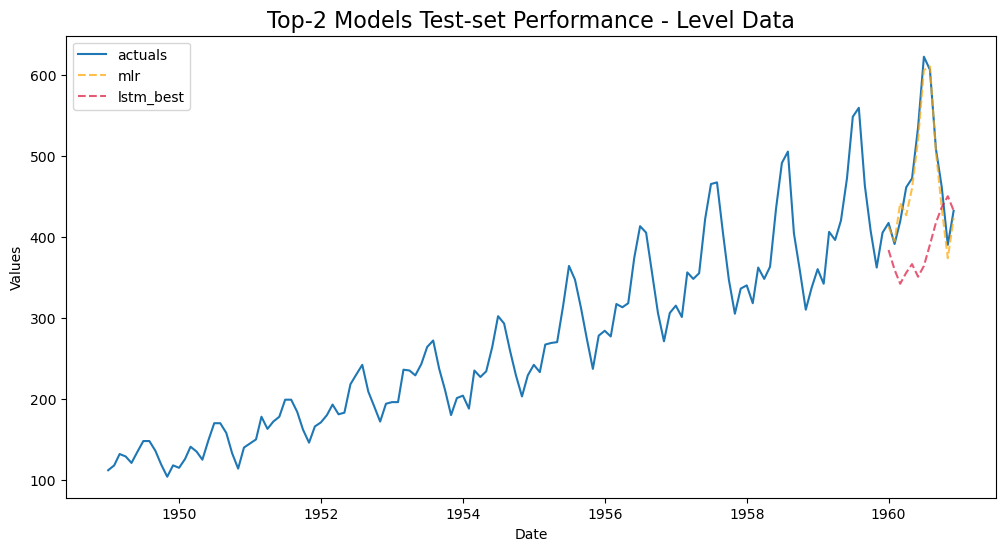

In [24]:
f.plot_test_set(order_by='TestSetRMSE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Test-set Performance - Level Data',size=16)
plt.show()

It is obvious that with much less work, we find a significantly better model. LSTM is not always suited for small datasets.

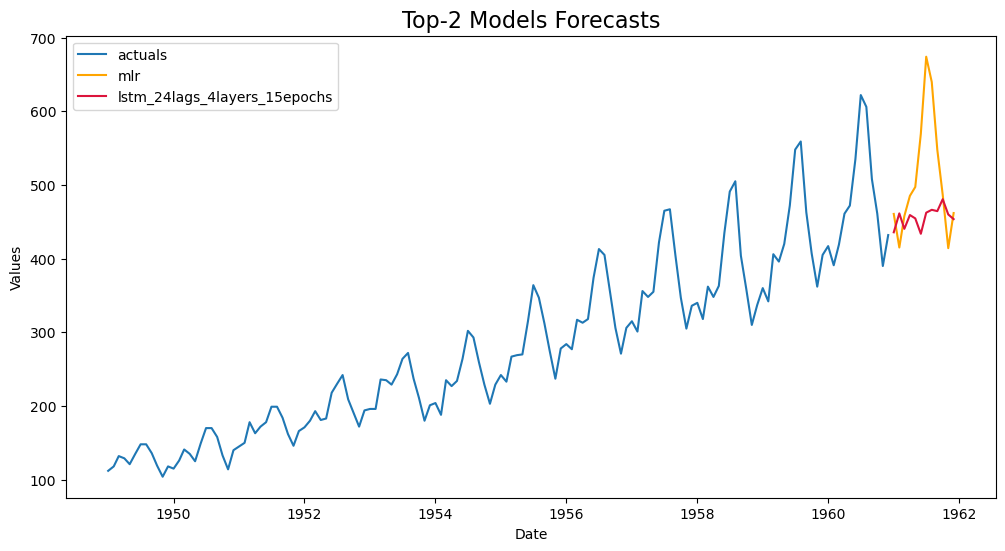

In [30]:
f.plot(order_by='TestSetRMSE',models='top_2')
plt.title('Top-2 Models Forecasts',size=16)
plt.show()

## Benchmarking

In [26]:
f.export('model_summaries',determine_best_by='TestSetRMSE')[
    ['ModelNickname','TestSetRMSE','TestSetR2','best_model']
]

,ModelNickname,TestSetRMSE,TestSetR2,best_model
0,mlr,16.929778,0.948259,True
1,lstm_24lags_4layers_15epochs,103.519850,-0.934545,False
2,lstm_24lags_earlystop_3layers,123.265942,-1.742949,False
3,lstm_best,125.797632,-1.856778,False
4,lstm_24lags,377.284938,-24.696297,False
5,lstm_default,381.723838,-25.304507,False
6,lstm_24lags_5epochs,397.339873,-27.500725,False


## Export Results

### Export forecasts

In [27]:
results = f.export(['lvl_fcsts','lvl_test_set_predictions'],models=['mlr','lstm_best'])
results['lvl_fcsts']

,DATE,mlr,lstm_best
0,1961-01-01,460.692736,418.733081
1,1961-02-01,415.111191,412.463130
2,1961-03-01,457.812493,359.564423
3,1961-04-01,485.170102,360.406359
4,1961-05-01,497.247526,391.018910
5,1961-06-01,569.466872,395.076499
6,1961-07-01,674.040142,395.889690
7,1961-08-01,639.727006,422.682514
8,1961-09-01,547.553936,419.706731
9,1961-10-01,486.825533,476.872237


### Export test-set preds

In [28]:
results['lvl_test_set_predictions']

,DATE,actual,mlr,lstm_best
0,1960-01-01,417.0,412.327552,383.622471
1,1960-02-01,391.0,394.228643,359.288299
2,1960-03-01,419.0,441.667413,342.000203
3,1960-04-01,461.0,426.435302,355.655532
4,1960-05-01,472.0,459.840137,366.194436
5,1960-06-01,535.0,519.990278,350.674164
6,1960-07-01,622.0,605.600979,363.954124
7,1960-08-01,606.0,610.016413,390.145618
8,1960-09-01,508.0,504.561604,417.435313
9,1960-10-01,461.0,435.009743,436.404341


### Export Feature Info
- For MLR only

In [29]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR11,0.051257,0.009612
AR10,0.051098,0.015627
AR1,0.050019,0.039104
AR13,0.028711,0.023353
AR22,0.021429,0.009396
AR21,0.015544,0.008871
month_8,0.011109,0.003531
month_10,0.008104,0.002442
AR7,0.006620,0.016535
